In [1]:
"""
Import Block copied from chap 1, added plt
"""
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display


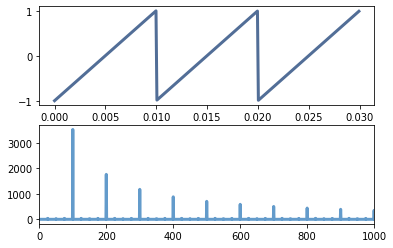

In [2]:
"""exercise 2.2 """

class SawtoothSignal(thinkdsp.Signal):
    """
    Sawtooth Wave class
    Takes the same inputs as Signal
    evaluate is the only modified 
    """
    def evaluate(self, ts):
        #not sure how signal goes negative...maybe handled
        #by other signal function calls
        cycles = self.freq * ts + self.offset / PI2
        frac , _ = np.modf(cycles)
        ys = normalize(unbias(frac),self.amp)
        return ys
    
saw = thinkdsp.SawtoothSignal(amp=1, freq=100, offset=0)
saw_period = 1/saw.freq
wave_saw = saw.make_wave(start = 0, duration = 3*saw_period,framerate=11025)

plt.subplot(2,1,1)
wave_saw.plot()

wave_saw = saw.make_wave(start=0, duration = 1)
spectrum=wave_saw.make_spectrum()

plt.subplot(2,1,2)
spectrum.plot()
plt.xlim(0,1000);


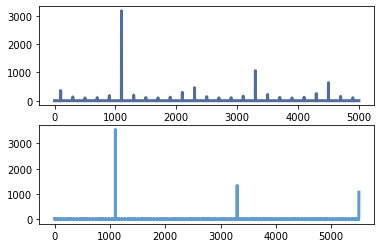

In [3]:
"""
Exercise 2.3
"""
square_sig = thinkdsp.SquareSignal(1100)
square_wave = square_sig.make_wave(start = 0, duration = 0.5, framerate = 10000)
square_spectrum = square_wave.make_spectrum()
plt.subplot(2,1,1)
square_spectrum.plot()
audio = square_wave.make_audio()
display(audio)
#playing around with sampling at a multiple of the fundamental
#obviously could put a low pass on the signal and then sample
#to remove aliased harmonics
square_sig2 = thinkdsp.SquareSignal(1100)
square_wave2 = square_sig2.make_wave(start = 0, duration = 0.5, framerate = 11000)
square_spectrum2 = square_wave2.make_spectrum()
plt.subplot(2,1,2)
square_spectrum2.plot()
audio2 = square_wave2.make_audio()
display(audio2)

(1.0769163338864018e-14+0j)
(100+0j)


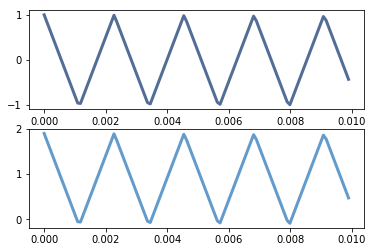

In [20]:
"""
Exercise 2.4
"""
#create a spectrum object
triangle_sig = thinkdsp.TriangleSignal(440)
triangle_wave = triangle_sig.make_wave(start = 0 , duration = 0.01, framerate = 11025)
plt.subplot(2,1,1)
triangle_wave.plot()
triangle_spectrum = triangle_wave.make_spectrum()
print(triangle_spectrum.hs[0]) #amplitude 1.07E-14 (nearly 0), 
#phase = 0deg (no imaginary component)
triangle_spectrum.hs[0] = 100
print(triangle_spectrum.hs[0])
new_wave = triangle_spectrum.make_wave()
plt.subplot(2,1,2)
new_wave.plot()
#setting hs[0]=100 Added a DC offset to the signal.

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


(0, 1000)

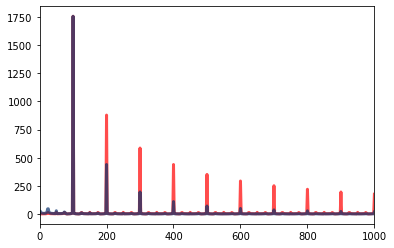

In [4]:
"""Exercise 2.5"""

def dividebyfs(spectrum):
    spectrum.hs= spectrum.hs/spectrum.fs
    spectrum.hs[0] = 0 #handle division by 0?
#create signals
sawtooth = thinkdsp.SawtoothSignal(freq= 100)
#create_waves
sawtooth_wave = sawtooth.make_wave(duration=0.5)
#create spectra
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot(high= 10000,color = 'red')
#pass spectra to dividebyfs
dividebyfs(sawtooth_spectrum)
#plot spectra
sawtooth_spectrum.scale(100)
sawtooth_spectrum.plot(high=10000)
plt.xlim(0,1000)

#had a bunch of plotting issues (needed the scale function)
#but the sound gives the idea
#The fundamental is retained, the harmonics are suppressed.

In [5]:
#continuing exercise 2.5
audio_sawtooth = sawtooth_wave.make_audio()
display(audio_sawtooth)
sawtooth_spectrum_audio = sawtooth_spectrum.make_wave().make_audio()
display(sawtooth_spectrum_audio)

(0, 1000)

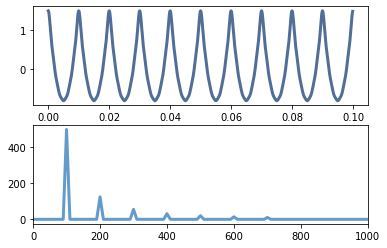

In [6]:
"""
Exercise 2.6
"""

#Waveform with Even and odd harmonics that drop off like 1/f^2
#brute force
cos_1 = thinkdsp.CosSignal(amp = 1, freq = 100)
cos_2 = thinkdsp.CosSignal(amp = 0.25, freq = 200)
cos_3 = thinkdsp.CosSignal(amp = 0.1111 , freq = 300)
cos_4 = thinkdsp.CosSignal(amp = 0.0625 , freq = 400)
cos_5 = thinkdsp.CosSignal(amp = 0.04 , freq = 500)
cos_6 = thinkdsp.CosSignal(amp = 0.0278, freq = 600 )
cos_7 = thinkdsp.CosSignal(amp = 0.0204, freq = 700)
sum_sig = cos_1 + cos_2 + cos_3 + cos_4 + cos_5+ cos_6 + cos_7
wave = sum_sig.make_wave(duration= 0.1, framerate = 10000)
plt.subplot(2,1,1)
wave.plot()
plt.subplot(2,1,2)
spectrum = wave.make_spectrum()
spectrum.plot()
plt.xlim(0,1000)


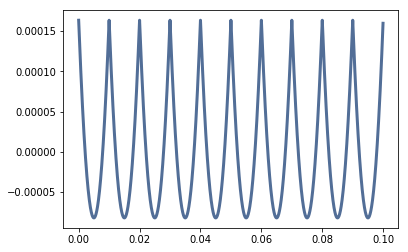

In [106]:
#more elegantly 
freqs = np.arange(100, 10000, 100)
amps = 1 / freqs**2
signal = sum(thinkdsp.CosSignal(freq,amp) for freq, amp in zip(freqs, amps))

wave = signal.make_wave(duration=0.5, framerate=20000)
wave.segment(duration=0.1).plot()
display(wave.make_audio())

(0, 2000)

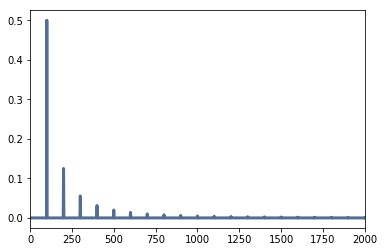

In [78]:
spectrum = wave.make_spectrum()
spectrum.plot()
plt.xlim(0,2000)